#Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
pip install requests


In [4]:
pip install kaggle


#Kaggle Instalation

In [5]:
!kaggle datasets download -d kushagra3204/wheat-plant-diseases


Dataset URL: https://www.kaggle.com/datasets/kushagra3204/wheat-plant-diseases
License(s): CC0-1.0
100% 6.09G/6.09G [01:14<00:00, 169MB/s]
100% 6.09G/6.09G [01:14<00:00, 88.0MB/s]


# Data Pre Processing

In [6]:
import zipfile
import os

# Path to the downloaded zip file
zip_path = '/content/wheat-plant-diseases.zip'
# Path to extract the dataset to
extract_to = '/content/path_to_extract'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
    print('Dataset extracted successfully!')


Dataset extracted successfully!


In [7]:
import os
print("Current working directory:", os.getcwd())
print("Contents of the current directory:", os.listdir('.'))


Current working directory: /content
Contents of the current directory: ['.config', 'path_to_extract', 'wheat-plant-diseases.zip', 'sample_data']


In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
import os
import imghdr
from PIL import Image

def verify_and_clean_images(directory):
    """
    Recursively verifies the format and integrity of images in a directory.
    Removes or skips invalid images and prints issues.

    Args:
        directory: The path to the directory containing the images.
    """
    for root, _, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(root, file)
            try:
                # Check if it's an image using imghdr
                img_type = imghdr.what(filepath)
                if img_type is None:
                    print(f"WARNING: {filepath} is not recognized as an image. Deleting it.")
                    os.remove(filepath)
                    continue

                # Check if it's a supported format
                if img_type not in ['jpeg', 'png', 'gif', 'bmp']:
                    print(f"WARNING: {filepath} is not in a supported format (JPEG, PNG, GIF, BMP). Deleting it.")
                    os.remove(filepath)
                    continue

                # Check integrity using Pillow
                with Image.open(filepath) as img:
                    img.verify()

            except (IOError, SyntaxError) as e:
                print(f"ERROR: {filepath} is likely corrupted or not an image: {e}. Deleting it.")
                os.remove(filepath)

# Verify and clean your training and validation directories
verify_and_clean_images('/content/path_to_extract/data/train')
verify_and_clean_images('/content/path_to_extract/data/valid')
verify_and_clean_images('/content/path_to_extract/data/test')


# Training Image Pre-Processing

In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/path_to_extract/data/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 12995 files belonging to 15 classes.


#Validation Image Pre-processing

In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/path_to_extract/data/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 296 files belonging to 15 classes.


# Building Model Using CNN

In [12]:
cnn = tf.keras.models.Sequential()

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [19]:
cnn.add(tf.keras.layers.Flatten())

In [20]:
cnn.add(tf.keras.layers.Dense(units=15,activation='relu'))

In [21]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=15,activation='softmax')) # Changed units to 15

In [22]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [23]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=15,activation='softmax'))

# Compiling and Training Phase

In [24]:
# Instead of using tf.keras.optimizers.legacy.Adam, use tf.keras.optimizers.Adam directly:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 15)                  │          30,735 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             240 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 4,743,439 (18.09 MB)

 Trainable params: 4,743,439 (18.09 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
407/407 ━━━━━━━━━━━━━━━━━━━━ 188s 423ms/step - accuracy: 0.0879 - loss: 2.6871 - val_accuracy: 0.0541 - val_loss: 2.7420
Epoch 2/15
407/407 ━━━━━━━━━━━━━━━━━━━━ 181s 402ms/step - accuracy: 0.1120 - loss: 2.6641 - val_accuracy: 0.0743 - val_loss: 2.7483
Epoch 3/15
407/407 ━━━━━━━━━━━━━━━━━━━━ 206s 411ms/step - accuracy: 0.0856 - loss: 2.7035 - val_accuracy: 0.0676 - val_loss: 2.7473
Epoch 4/15
407/407 ━━━━━━━━━━━━━━━━━━━━ 167s 410ms/step - accuracy: 0.0861 - loss: 2.6972 - val_accuracy: 0.0676 - val_loss: 2.7453
Epoch 5/15
407/407 ━━━━━━━━━━━━━━━━━━━━ 194s 392ms/step - accuracy: 0.0962 - loss: 2.6893 - val_accuracy: 0.0676 - val_loss: 2.7445
Epoch 6/15
407/407 ━━━━━━━━━━━━━━━━━━━━ 157s 386ms/step - accuracy: 0.0968 - loss: 2.6832 - val_accuracy: 0.0676 - val_loss: 2.7443
Epoch 7/15
407/407 ━━━━━━━━━━━━━━━━━━━━ 205s 392ms/step - accuracy: 0.0951 - loss: 2.6800 - val_accuracy: 0.0676 - val_loss: 2.7446
Epoch 8/15
407/407 ━━━━━━━━━━━━━━━━━━━━ 151s 371ms/step - accuracy: 0.1034 -

#Evaluating model

In [27]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

407/407 ━━━━━━━━━━━━━━━━━━━━ 143s 352ms/step - accuracy: 0.1015 - loss: 2.6480
Training accuracy: 0.10080800205469131


In [28]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.0654 - loss: 2.7710
Validation accuracy: 0.06756756454706192


#Saving Model

In [29]:
cnn.save('trained_wheat_disease_model.keras')

In [30]:
training_history.history #Return Dictionary of history

{'accuracy': [0.09780684858560562,
  0.11935359984636307,
  0.0859561339020729,
  0.09103501588106155,
  0.09696036577224731,
  0.09849942475557327,
  0.09772989898920059,
  0.09973066300153732,
  0.09819161146879196,
  0.09788379818201065,
  0.10227010399103165,
  0.10111581534147263,
  0.10034628957509995,
  0.09934590011835098,
  0.10126972198486328],
 'loss': [2.677459716796875,
  2.656707525253296,
  2.7003796100616455,
  2.6936182975769043,
  2.6846203804016113,
  2.679781675338745,
  2.6765940189361572,
  2.6717264652252197,
  2.668788194656372,
  2.667771577835083,
  2.6627354621887207,
  2.661451816558838,
  2.6590118408203125,
  2.6594831943511963,
  2.66048264503479],
 'val_accuracy': [0.054054055362939835,
  0.07432432472705841,
  0.06756756454706192,
  0.06756756454706192,
  0.06756756454706192,
  0.06756756454706192,
  0.06756756454706192,
  0.06756756454706192,
  0.06756756454706192,
  0.06756756454706192,
  0.06756756454706192,
  0.06756756454706192,
  0.067567564547061

In [31]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [32]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


#Accuracy Visualization

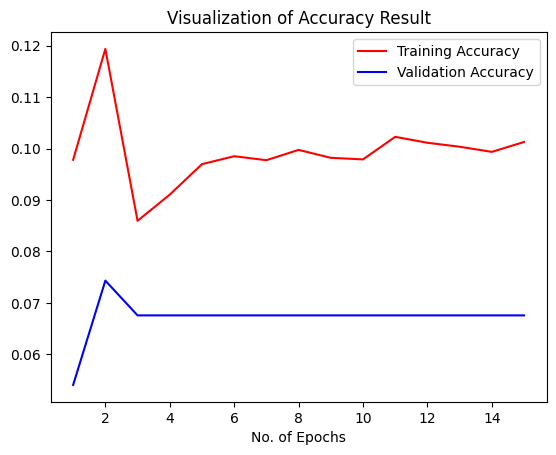

In [33]:
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]  # Create epochs list based on length of training history
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [34]:
class_name = validation_set.class_names

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/path_to_extract/data/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 742 files belonging to 15 classes.


In [36]:
import os



# Re-check your image_dataset_from_directory call for 'test_set':
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/path_to_extract/data/test', # Double-check this directory path
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# If the file is corrupted/deleted
# 1. Remove the entry from class_names if it's listed.
# 2. Rebuild the test dataset without the problematic file.
# 3. Consider replacing the file.

Found 742 files belonging to 15 classes.


In [37]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

742/742 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step


#Metrix for Evalution

In [38]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [39]:
Y_true

<tf.Tensor: shape=(742,), dtype=int64, numpy=
array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,

In [40]:
predicted_categories

<tf.Tensor: shape=(742,), dtype=int64, numpy=
array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [42]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                            precision    recall  f1-score   support

               aphid_valid       0.00      0.00      0.00        47
          black_rust_valid       0.00      0.00      0.00        50
          blast_test_valid       0.00      0.00      0.00        46
          brown_rust_valid       0.00      0.00      0.00        50
     common_root_rot_valid       0.00      0.00      0.00        50
fusarium_head_blight_valid       0.00      0.00      0.00        50
             healthy_valid       0.00      0.00      0.00        50
         leaf_blight_valid       0.00      0.00      0.00        50
              mildew_valid       0.00      0.00      0.00        50
                mite_valid       0.00      0.00      0.00        49
            septoria_valid       0.00      0.00      0.00        50
                smut_valid       0.07      1.00      0.13        50
            stem_fly_valid       0.00      0.00      0.00        50
            tan_spot_valid       0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Confusion Matrix

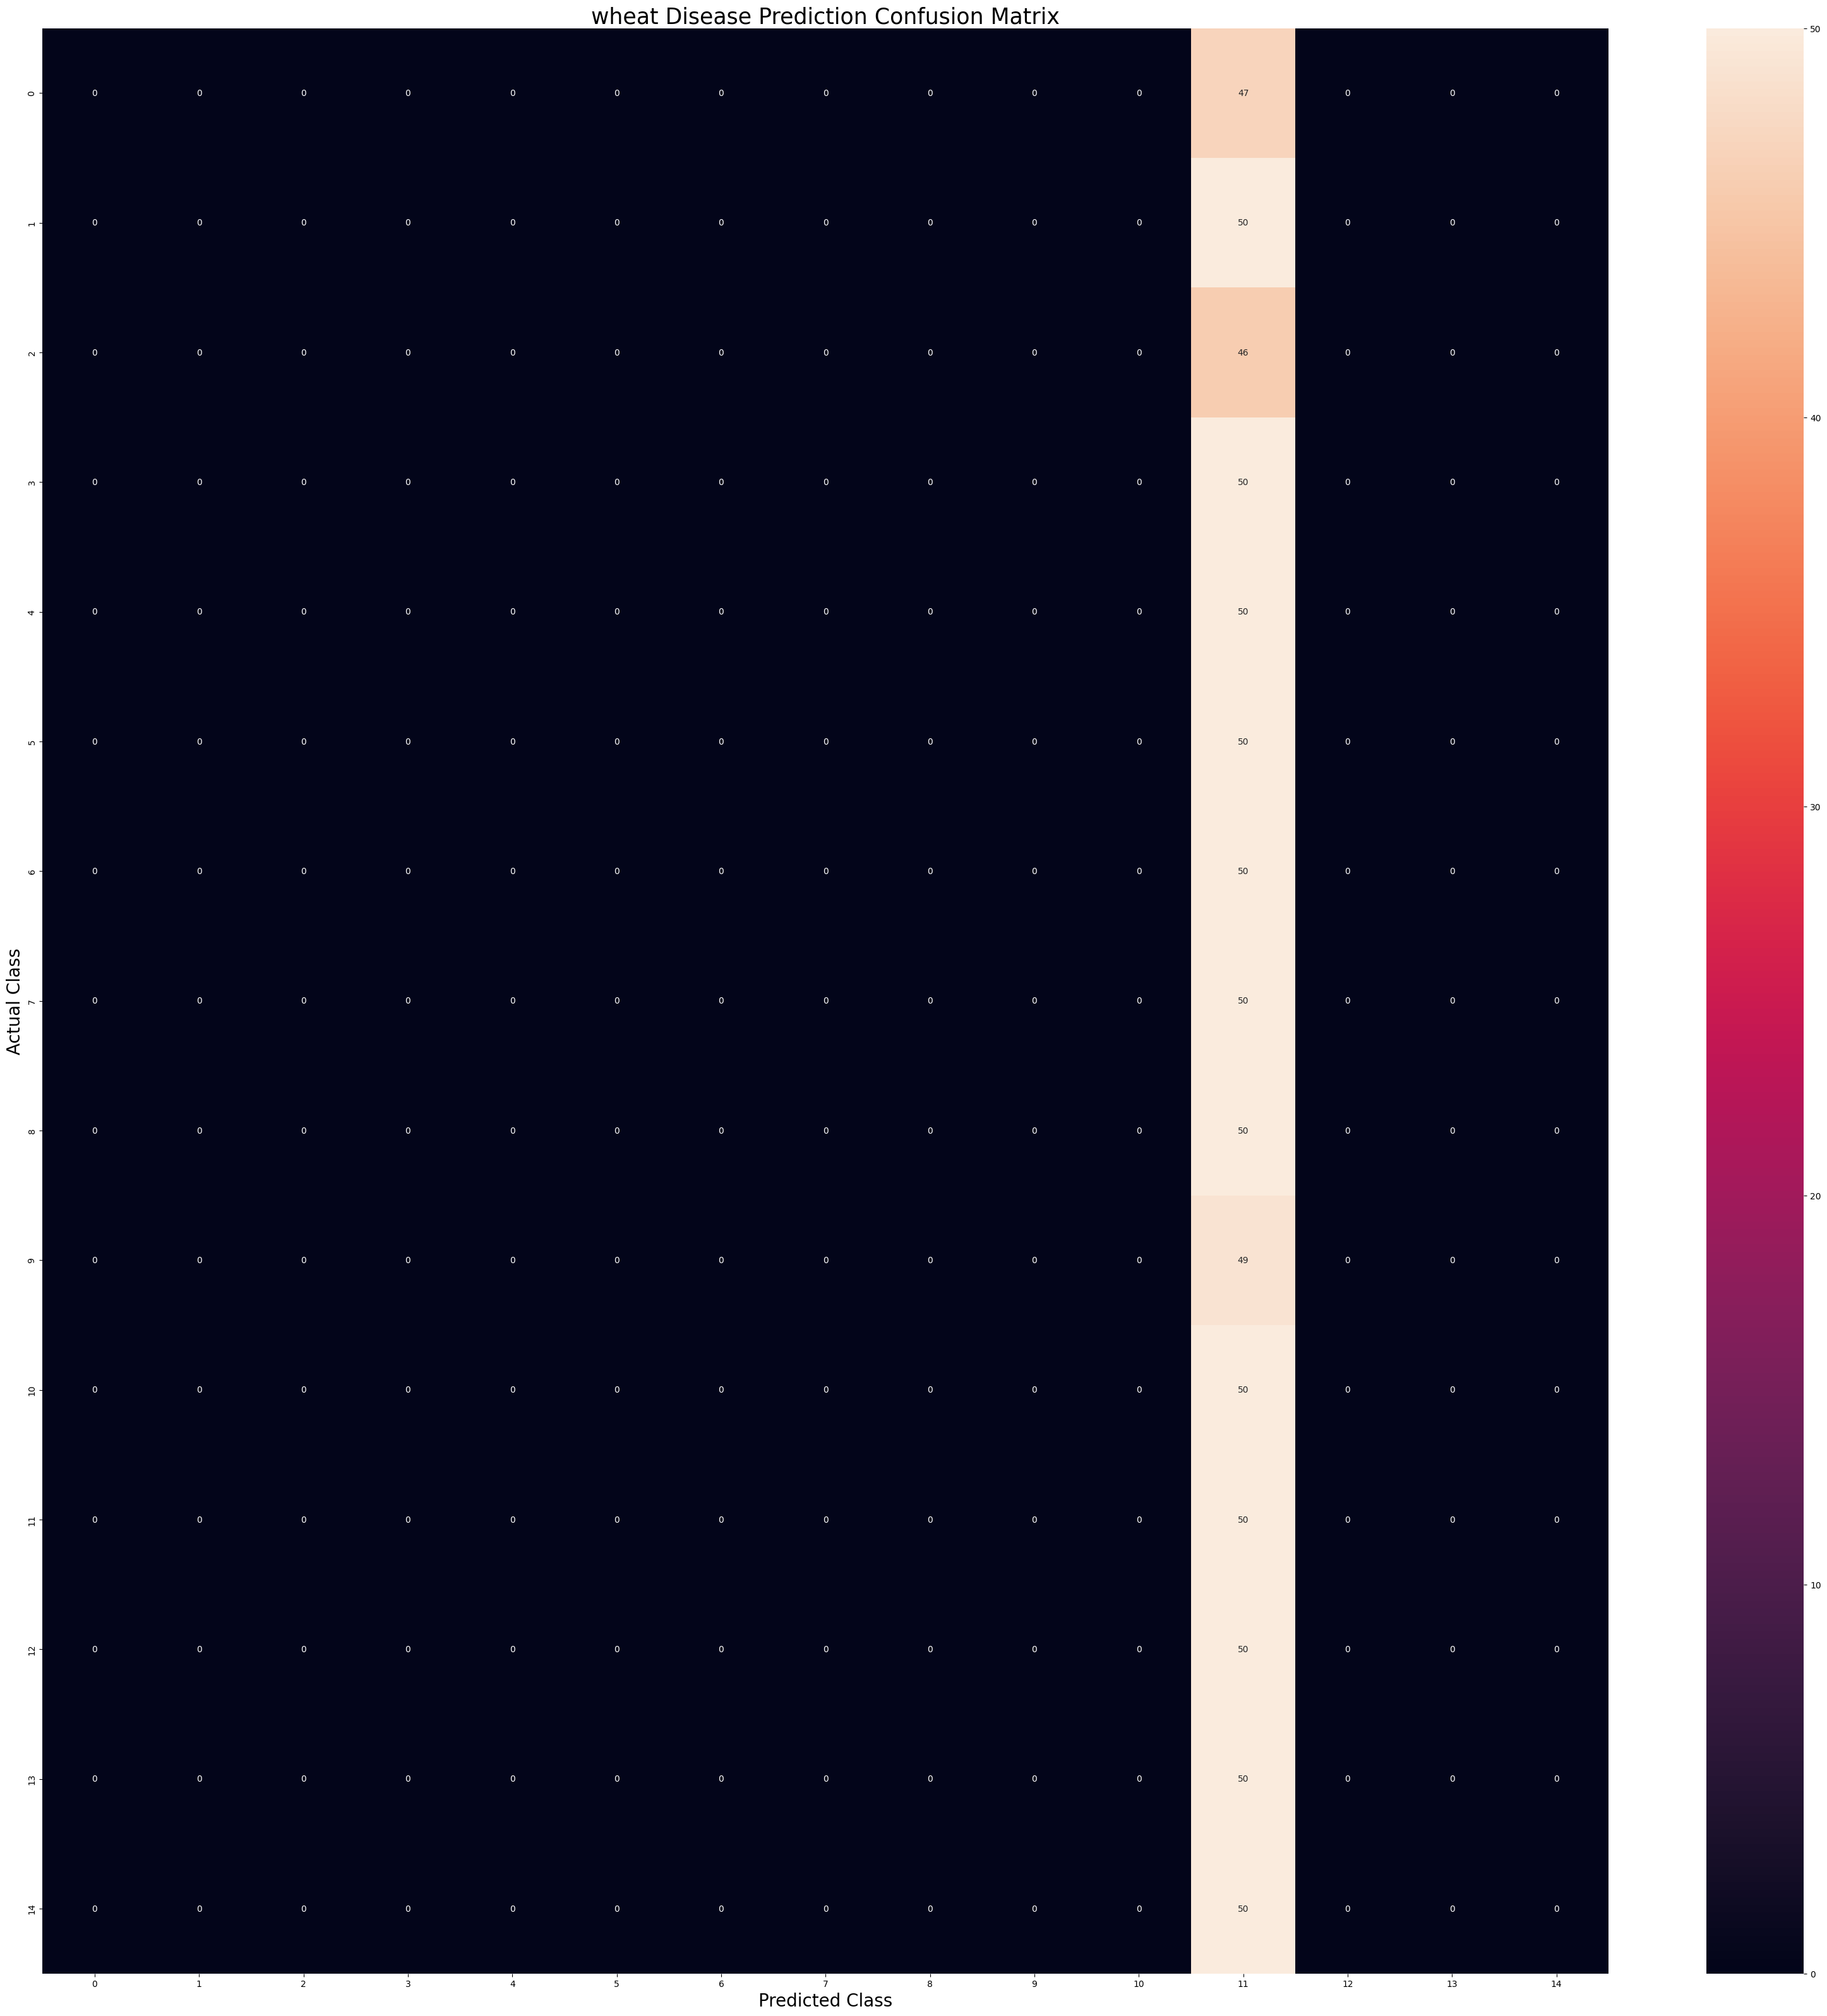

In [43]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('wheat Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [44]:
import numpy as np
import tensorflow as tf
# Import ImageDataGenerator from tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [45]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/path_to_extract/data/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 296 files belonging to 15 classes.
['aphid_valid', 'black_rust_valid', 'blast_test_valid', 'brown_rust_valid', 'common_root_rot_valid', 'fusarium_head_blight_valid', 'healthy_valid', 'leaf_blight_valid', 'mildew_valid', 'mite_valid', 'septoria_valid', 'smut_valid', 'stem_fly_valid', 'tan_spot_valid', 'yellow_rust_valid']


In [46]:
cnn = tf.keras.models.load_model('/content/trained_wheat_disease_model.keras')

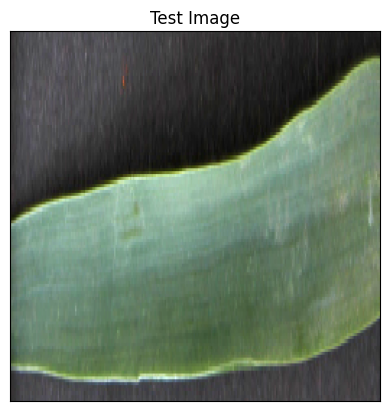

In [52]:
#Test Image Visualization
import cv2
image_path = '/content/path_to_extract/data/test/healthy_test/healthy_test_15.png'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [53]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [54]:
print(predictions)

[[0.06836028 0.04940144 0.05249607 0.08707103 0.04835436 0.0523965
  0.07697307 0.06749179 0.07949162 0.06270045 0.08298548 0.09407689
  0.02713777 0.05745921 0.09360407]]


In [55]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

11


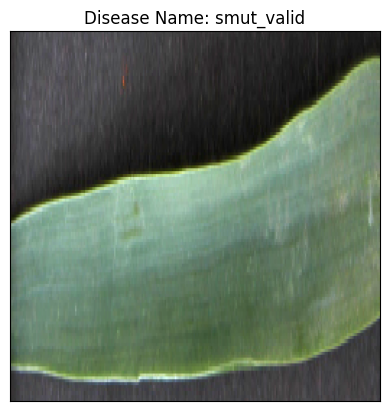

In [57]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()